3.1 数据预处理

In [1]:
# 导入相关依赖库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,confusion_matrix,roc_curve,auc,RocCurveDisplay,classification_report

from xgboost import XGBClassifier
# from matplotlib import pyplot
from xgboost import plot_importance,to_graphviz



In [2]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv('./DATA/nasa.csv')# 读取NASA数据集
X=df.iloc[:, :39]  #获取特征值
Y=df.iloc[:,-1:]  #获取标签

In [4]:
print("数据集特征:",X.shape)
print("特征名称：")
print(X.columns)
print("分类名称：")
print(Y.columns)

数据集特征: (4687, 39)
特征名称：
Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox'],
      dtype='object')
分类名称：
Index(['Hazardous

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Neo Reference ID,4687.0,NaN,NaN,NaN,3272297.771709,548601.083264,2000433.0,3097593.5,3514799.0,3690059.5,3781897.0
Name,4687.0,NaN,NaN,NaN,3272297.771709,548601.083264,2000433.0,3097593.5,3514799.0,3690059.5,3781897.0
Absolute Magnitude,4687.0,NaN,NaN,NaN,22.267865,2.890972,11.16,20.1,21.9,24.5,32.1
Est Dia in KM(min),4687.0,NaN,NaN,NaN,0.204604,0.369573,0.001011,0.033462,0.110804,0.253837,15.579552
Est Dia in KM(max),4687.0,NaN,NaN,NaN,0.457509,0.826391,0.00226,0.074824,0.247765,0.567597,34.836938
Est Dia in M(min),4687.0,NaN,NaN,NaN,204.604203,369.573402,1.010543,33.462237,110.803882,253.837029,15579.552413
Est Dia in M(max),4687.0,NaN,NaN,NaN,457.508906,826.391249,2.259644,74.823838,247.765013,567.596853,34836.938254
Est Dia in Miles(min),4687.0,NaN,NaN,NaN,0.127135,0.229642,0.000628,0.020792,0.06885,0.157727,9.680682
Est Dia in Miles(max),4687.0,NaN,NaN,NaN,0.284283,0.513496,0.001404,0.046493,0.153954,0.352688,21.646663
Est Dia in Feet(min),4687.0,NaN,NaN,NaN,671.273653,1212.511199,3.315431,109.784247,363.529809,832.798679,51114.018738


In [7]:
df = df.drop(['Neo Reference ID', 'Name', 'Orbit ID', 'Close Approach Date',
                        'Epoch Date Close Approach', 'Orbit Determination Date'] , axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [8]:
# hazardous_labels = pd.get_dummies(df['Hazardous'])
# hazardous_labels

In [9]:
# 将hazardous_labels与df合并 
# df = pd.concat([df, hazardous_labels], axis = 1)
# df.head()

In [10]:
# 从 df 中删除 'Hazardous' 列：
# df = df.drop(['Hazardous'], axis = 1)
# df.head()

In [11]:
# 查看df现在的信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Relative Velocity km per sec  4687 non-null   float64
 10  Relative Velocity km per hr   4687 non-null   float64
 11  Miles per hour                4687 non-null   float64
 12  Miss Dist.(Astronomical)      4687 non-null   float64
 13  Mis

In [12]:
df.isnull().sum() #查看表df中的缺失值

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Tim

In [13]:
df['Orbiting Body'].value_counts()

Earth    4687
Name: Orbiting Body, dtype: int64

In [14]:
df['Equinox'].value_counts()

J2000    4687
Name: Equinox, dtype: int64

In [15]:
# 删除两个特征
df = df.drop(['Orbiting Body', 'Equinox'], axis = 1)

相关性热图

<AxesSubplot:>

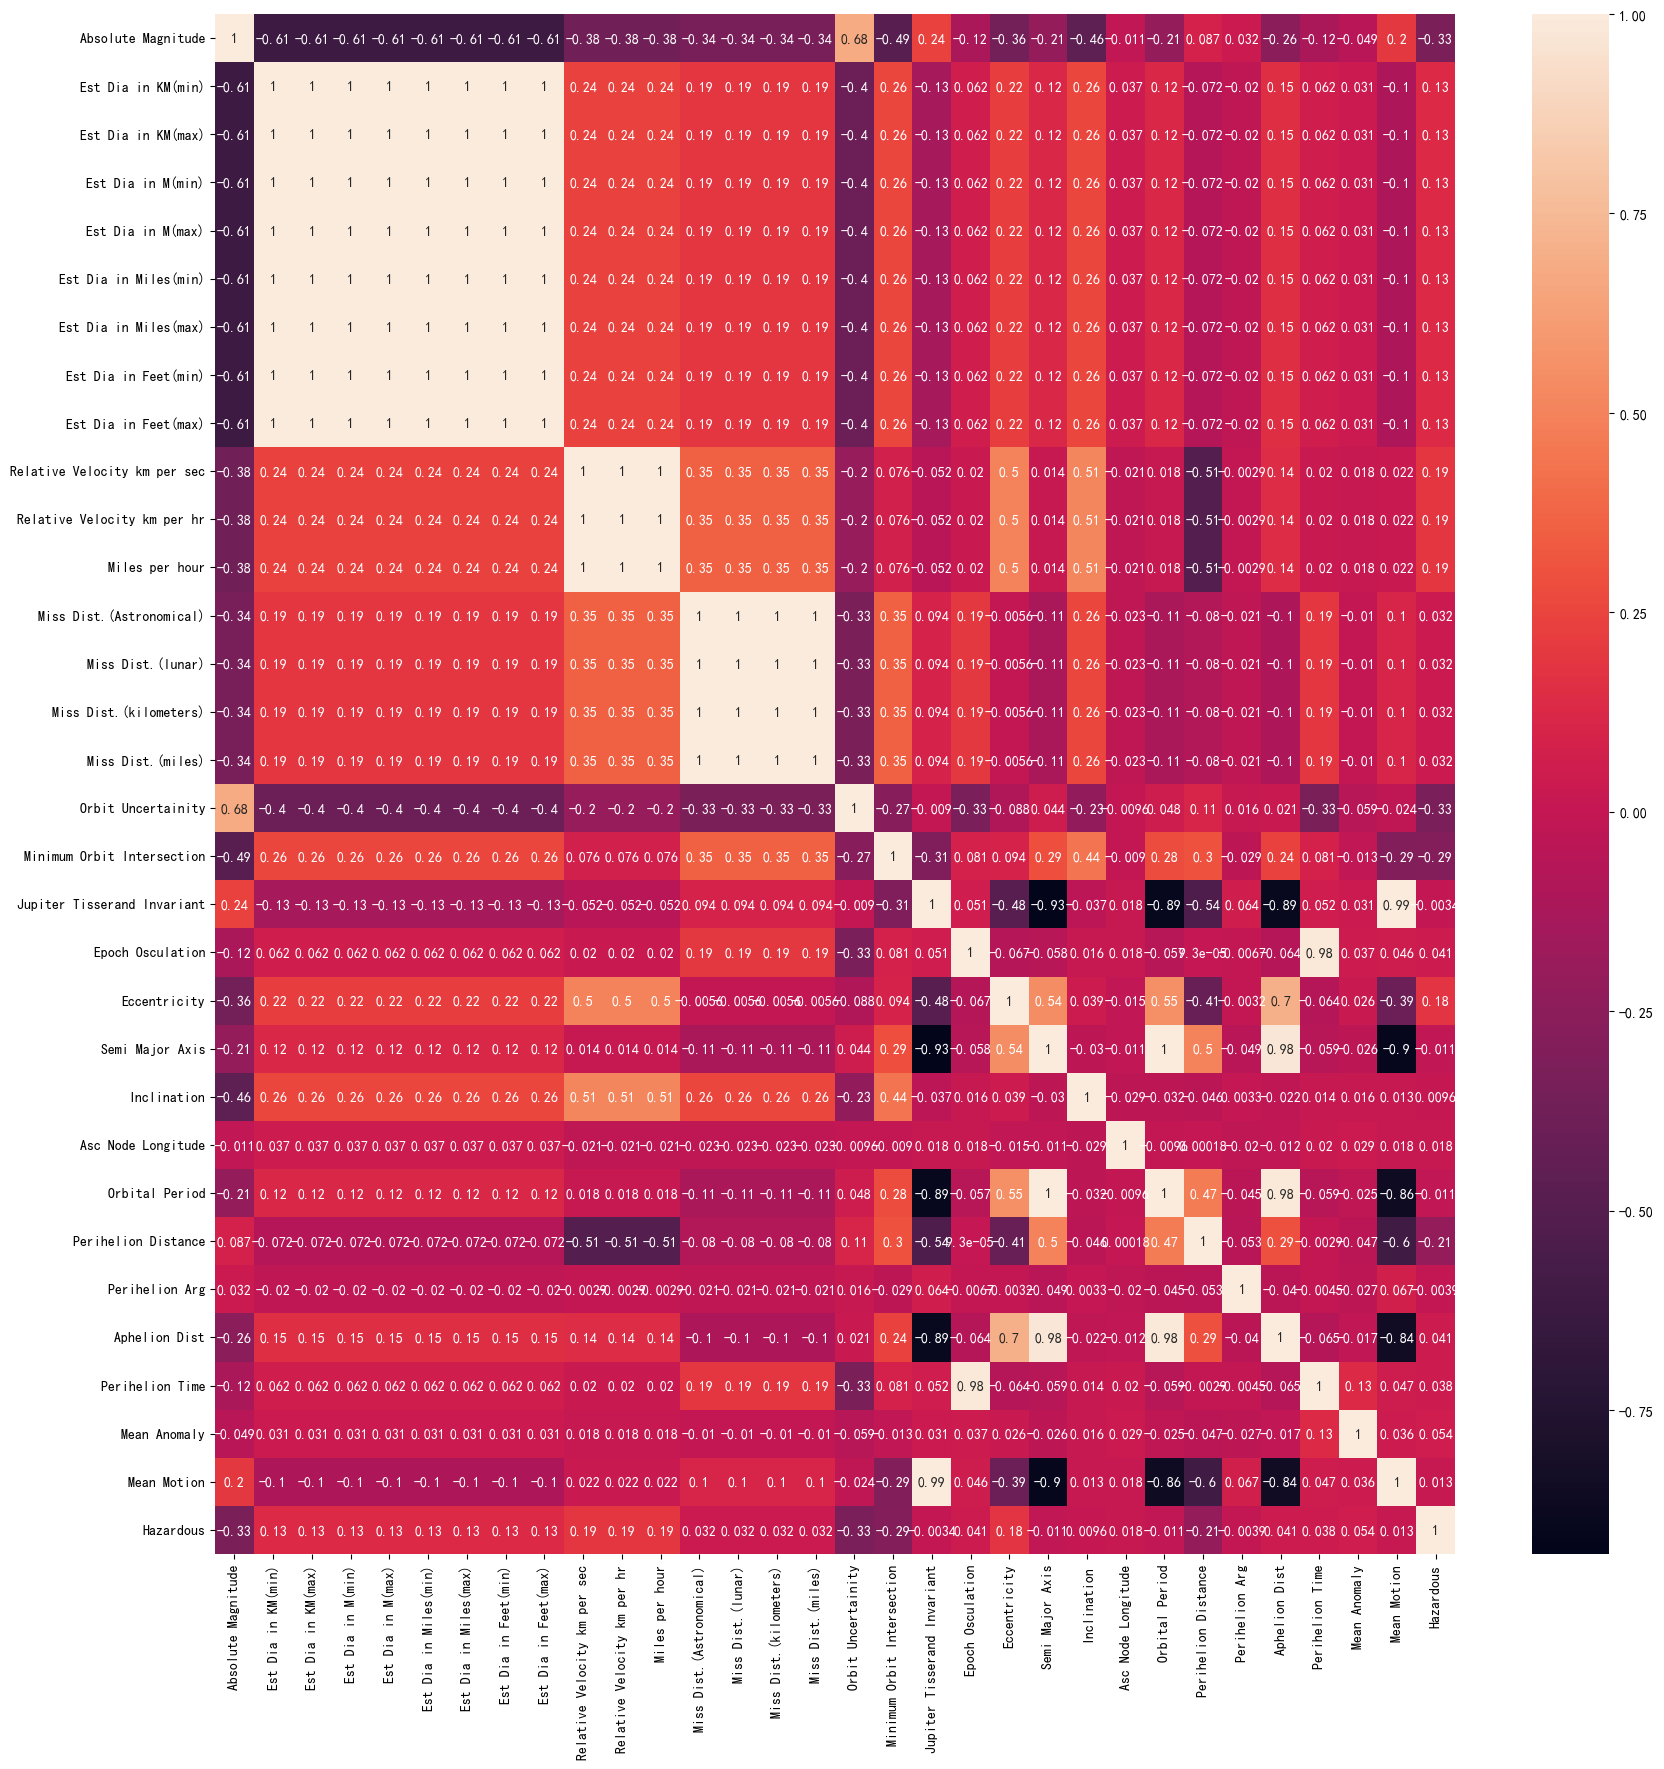

In [16]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

In [17]:
df = df.drop(['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)'
             ,'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 
             'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(lunar)', 
             'Miss Dist.(kilometers)', 'Miss Dist.(miles)'], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


<AxesSubplot:>

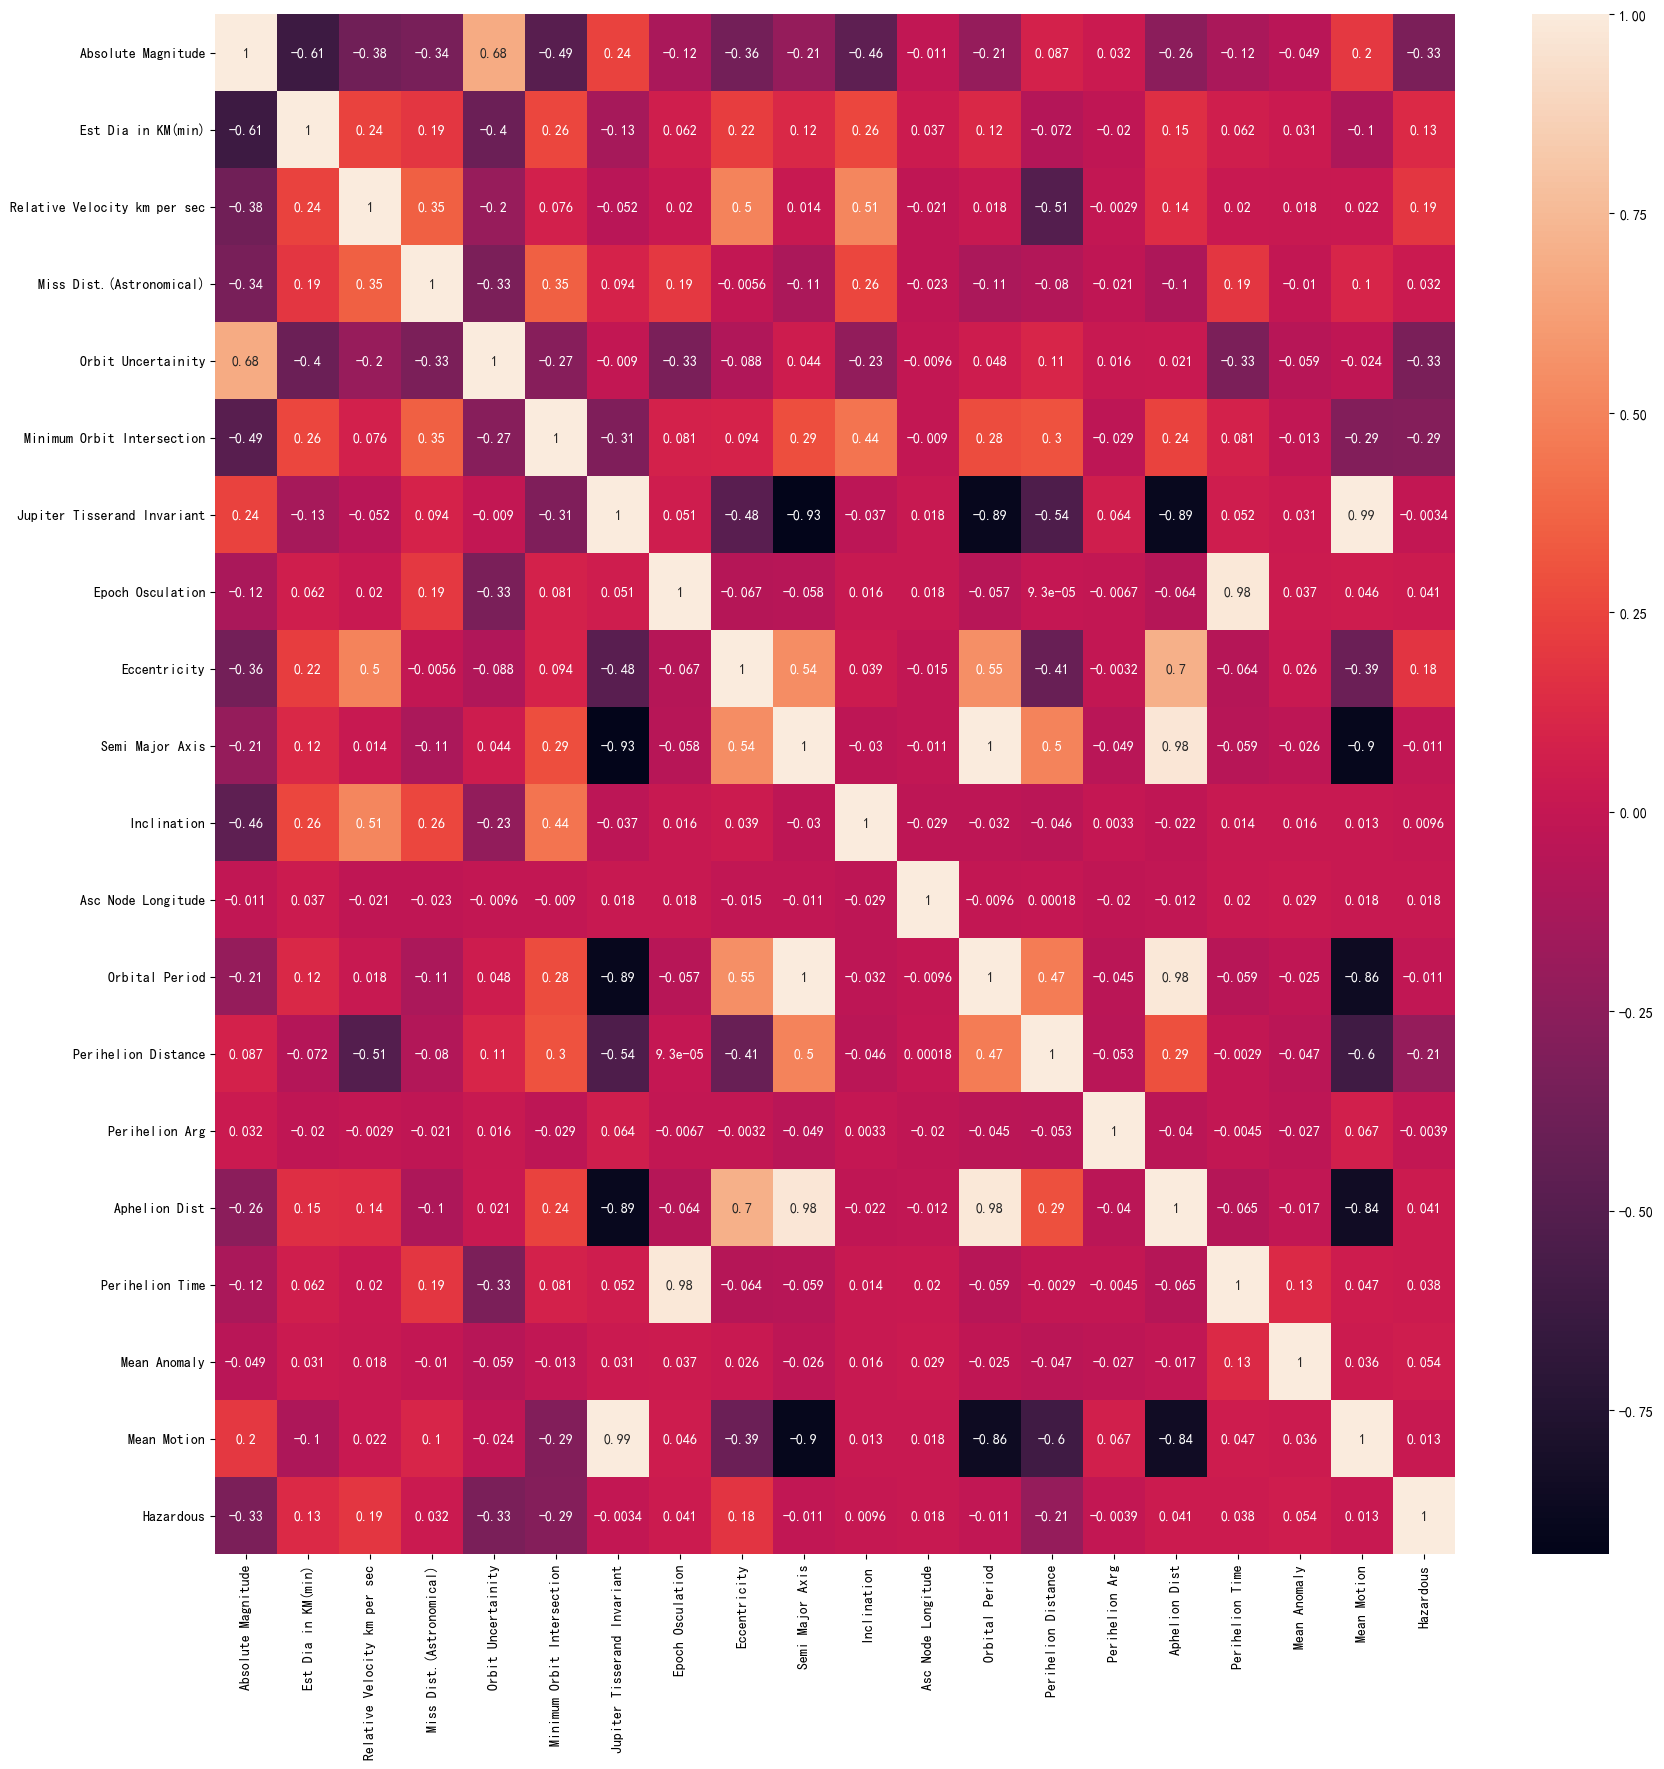

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

In [19]:
df.describe()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,0.204604,13.970811,0.256778,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,0.369573,7.293223,0.145798,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,0.001011,0.335504,0.000178,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,0.033462,8.432865,0.133420,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,0.110804,12.917889,0.265029,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,0.253837,18.077649,0.384154,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,15.579552,44.633747,0.499884,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [20]:
x = df.drop(['Hazardous'], axis = 1) 
y = df['Hazardous'].astype(int) #选择df中标签为 Hazardous 的行，并将这些行的数据类型转换为整数

# 按照 7 : 3划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0 , test_size = 0.3)

建立模型

In [21]:
# 该函数接受x, y和模型，并使用x和y训练集对模型列表中的每个算法进行k-fold交叉验证。
# 以表格格式和箱形图显示准确度、精度、召回率、f1分数的平均值和标准差。
# Parameters- x <array>:特征值。
# —y <array>:目标值。
# models <list>:要评估的模型对象的列表。
def model_evaluation(x, y, models): # 接收特征值、目标值、要评估的模型对象的列表
    names = []
    scoring = ['accuracy', 'precision', 'recall', 'f1']

    #创建一个DataFrame来存储不同算法的不同度量值
    df_results = pd.DataFrame(columns=['Algorithm', 'Acc Mean', 'Acc STD', 'Pre Mean', 'Pre STD', 
                                       'Rec Mean', 'Rec STD', 'F1 Mean', 'F1 STD'])
    results_acc = [] # 每种算法每个折叠的精确度得分列表
    results_pre = [] # 每种算法每个折叠的准确度得分列表
    results_rec = [] # 每种算法每个折叠的召回分数列表
    results_f1 = []  # 每种算法每个折叠的 F1 分数列表


    for name, model in models:
        names.append(name)
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
        result = cross_validate(model, x, y, cv=kfold, scoring=scoring)
        # 算法精确度得分的平均值和标准偏差
        acc_mean = result['test_accuracy'].mean()
        acc_std = result['test_accuracy'].std()
        # 算法准确度得分的平均值和标准偏差
        pre_mean = result['test_precision'].mean()
        pre_std = result['test_precision'].std()
        # 算法召回率（Recall Rate）分数的平均值和标准偏差
        rec_mean = result['test_recall'].mean()
        rec_std = result['test_recall'].std()
        # 算法F1分数（F1 Score）的平均值和标准偏差
        f1_mean = result['test_f1'].mean()
        f1_std = result['test_f1'].std()
        
        # 存储结果
        df_result_row = {'Algorithm': name, 'Acc Mean': acc_mean, 'Acc STD': acc_std, 'Pre Mean': pre_mean, 
                         'Pre STD': pre_std, 'Rec Mean': rec_mean, 'Rec STD': rec_std, 'F1 Mean': f1_mean, 
                         'F1 STD': f1_std}
        # 将该行添加到df中
        df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index=True)
        
        results_acc.append(result['test_accuracy'])
        results_pre.append(result['test_precision'])
        results_rec.append(result['test_recall'])
        results_f1.append(result['test_f1'])

    df_results = df_results.set_index('Algorithm')
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    # 显示所有算法的所有指标的平均值和标准偏差
    print(df_results)

    # 在图中显示总体结果
    plot_objects = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
    fig, (ax1, ax2, ax3, ax4) = plot_objects
    
    ax1.boxplot(results_acc)
    ax1.set_title('Accuracy', fontsize=14)
    ax1.set_xticklabels(names, rotation=30)
    ax2.boxplot(results_pre)
    ax2.set_title('Precision', fontsize=14)
    ax2.set_xticklabels(names, rotation=30)
    ax3.boxplot(results_rec)
    ax3.set_title('Recall', fontsize=14)
    ax3.set_xticklabels(names, rotation=30)
    ax4.boxplot(results_f1)
    ax4.set_title('F1-Score', fontsize=14)
    ax4.set_xticklabels(names, rotation=30)
    plt.tight_layout()
    plt.show()

集成方法

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
ens_models = []
ens_models.append(('RFC', RandomForestClassifier())) #随机森林
ens_models.append(('ABC', AdaBoostClassifier())) #AdaBoost
ens_models.append(('GBC', GradientBoostingClassifier())) #梯度提升

           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
RFC           0.996    0.004     0.993    0.012     0.985    0.024    0.989   
ABC           0.995    0.003     0.989    0.009     0.983    0.023    0.986   
GBC           0.996    0.004     0.991    0.012     0.985    0.024    0.988   

           F1 STD  
Algorithm          
RFC         0.011  
ABC         0.011  
GBC         0.012  


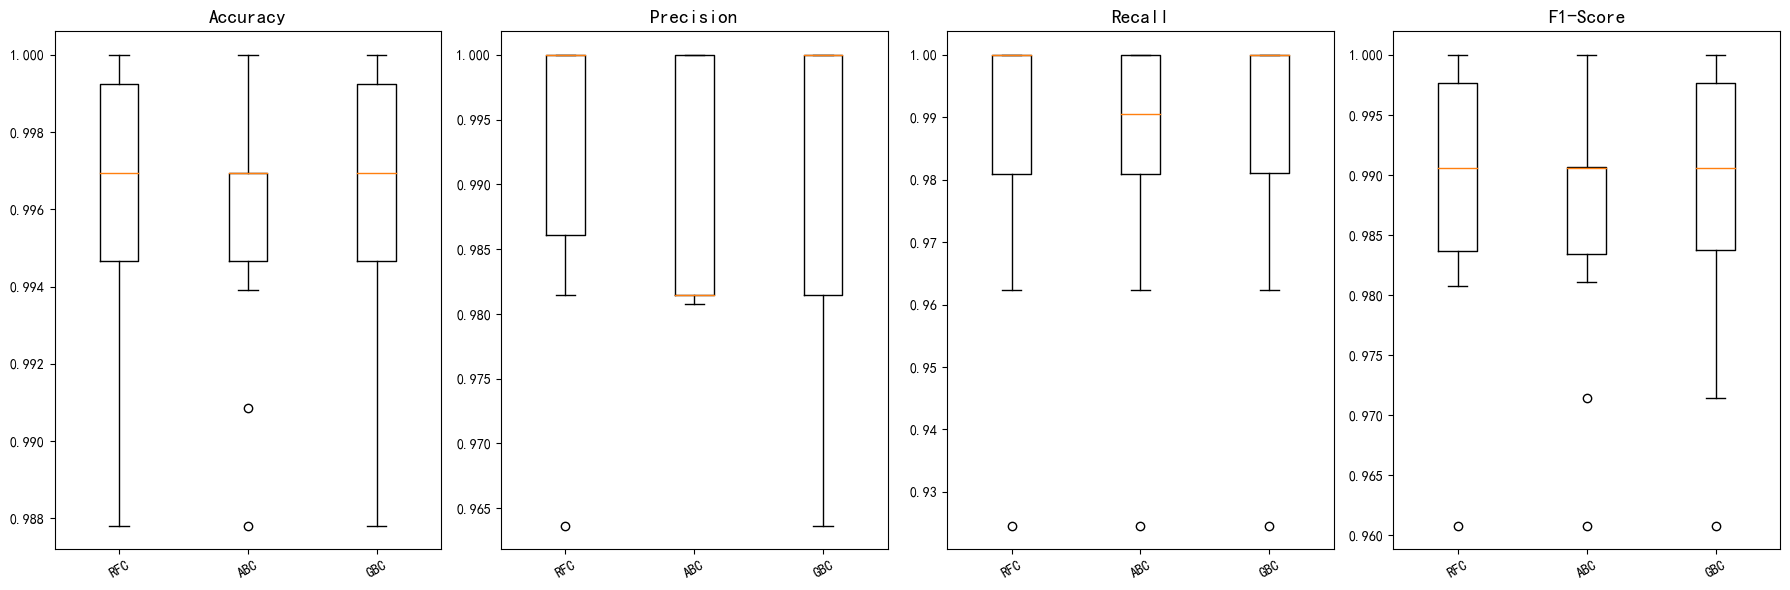

In [24]:
model_evaluation(x_train, y_train, ens_models)

非线性方法

In [25]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [26]:
nl_models = []
nl_models.append(('DTC', DecisionTreeClassifier())) #决策树分类器
nl_models.append(('KNN', KNeighborsClassifier())) #K近邻分类器
nl_models.append(('GNB', GaussianNB())) #高斯朴素贝叶斯分类器
nl_models.append(('XGB', XGBClassifier()))  #XGBoost分类器

           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
DTC           0.996    0.003     0.987    0.018     0.989    0.017    0.988   
KNN           0.805    0.008     0.259    0.051     0.112    0.026    0.156   
GNB           0.898    0.018     0.646    0.051     0.832    0.034    0.726   
XGB           0.996    0.004     0.985    0.014     0.989    0.019    0.987   

           F1 STD  
Algorithm          
DTC         0.010  
KNN         0.034  
GNB         0.042  
XGB         0.012  


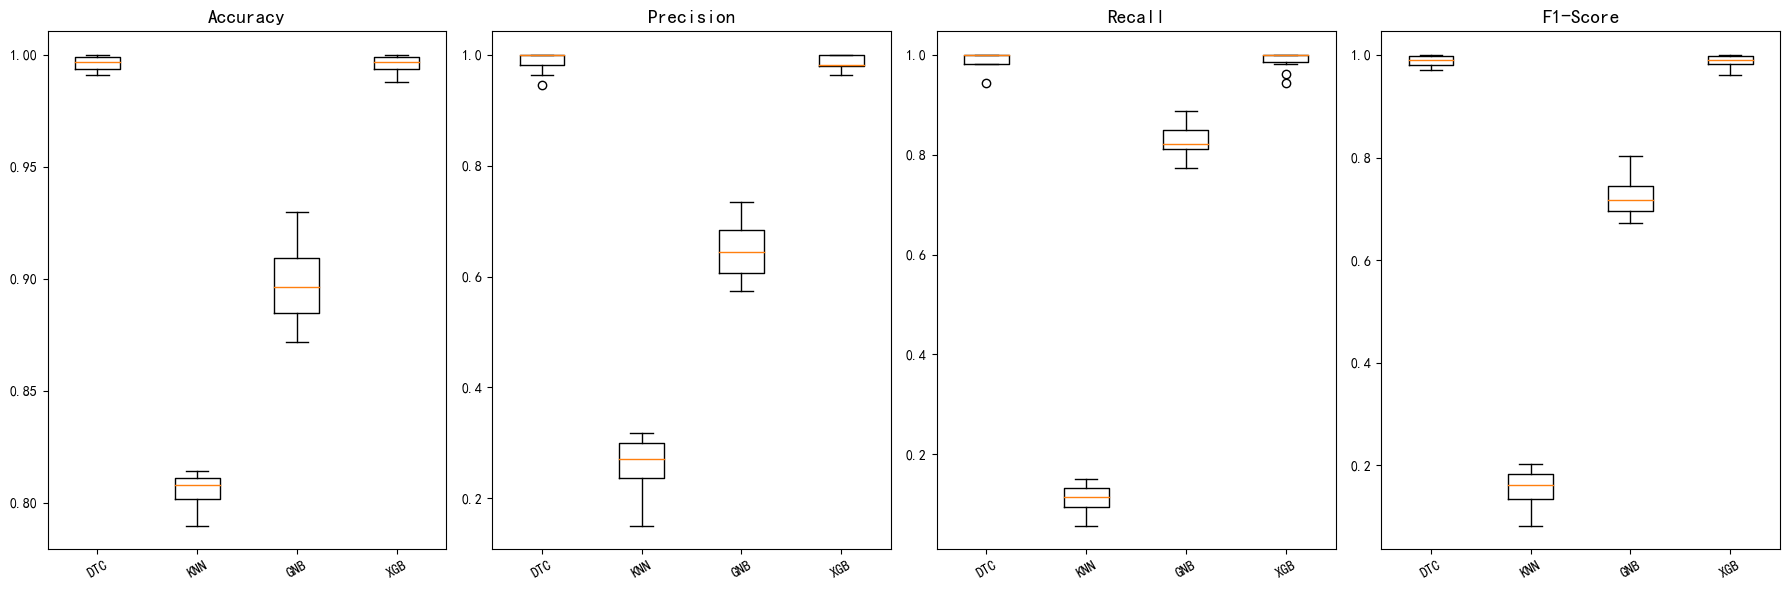

In [27]:
model_evaluation(x_train, y_train, nl_models)

最终模型

In [28]:
xgb_model = XGBClassifier() # 创建一个XGBoost分类器对象

# 定义交叉验证策略  
crossvalidation = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

h_params = {
    'n_estimators': [10, 100, 250],
    'learning_rate': [0.1, 0.5, 1],
    'booster': ['gblinear', 'gbtree']
}

# 使用GridSearchCV进行超参数搜索 
grid = GridSearchCV(
    estimator = xgb_model,
    param_grid = h_params,
    scoring = 'recall', # 使用召回率作为评分指标  
    n_jobs = -1, # 使用所有可用的处理器核心  
    cv = crossvalidation
)

# 使用训练数据拟合GridSearchCV对象  
grid.fit(x_train, y_train)

# 打印最佳得分和提供该得分的超参数
grid.best_params_, grid.best_score_

({'booster': 'gbtree', 'learning_rate': 1, 'n_estimators': 100},
 0.9848876909254267)

In [29]:
model = XGBClassifier(**grid.best_params_)
model.fit(x_train, y_train) 

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
predictions = model.predict(x_test)

0.9957356076759062 3


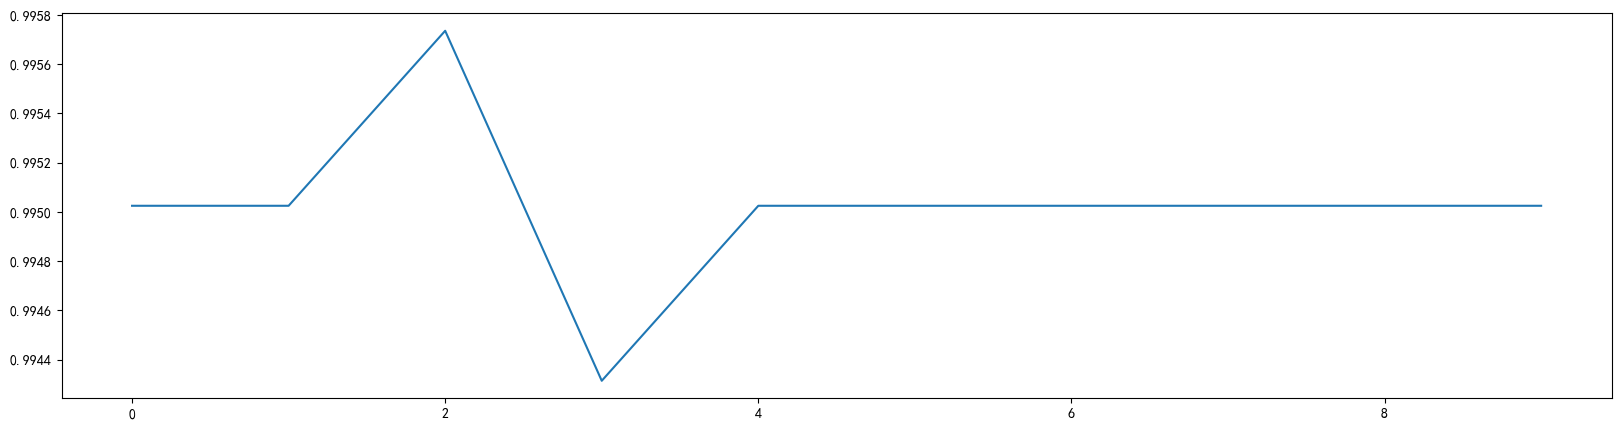

In [31]:
scorel = []
for i in range(0,10,1):
    model = XGBClassifier(max_depth =i,
                                 n_jobs=--4,
                                 random_state=90,
                         **grid.best_params_).fit(x_train,y_train)
    score = model.score(x_test,y_test)
    scorel.append(score)
 
print(max(scorel),(scorel.index(max(scorel))*1)+1)  
plt.figure(figsize=[20,5])
plt.plot(range(0,10,1),scorel)
plt.show()

xgboost可视化

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\Python\Anaconda\envs\python309\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Xiao\AppData\Local\Temp\ipykernel_20116\330443686.py", line 1, in <module>
    plot_tree(model, num_trees=0)
NameError: name 'plot_tree' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Python\Anaconda\envs\python309\lib\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "D:\Python\Anaconda\envs\python309\lib\site-packages\IPython\core\ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_traceback(
  File "D:\Python\Anaconda\envs\python309\lib\site-packages\IPython\core\ultratb.py", line 1287, in structured_traceback
    return VerboseTB.structured_traceback(
  File "D:\Pyth

In [42]:
dot_path = r'E:\A_PLUS\Graphviz-10.0.1-win64\bin\dot.exe'  
os.environ["PATH"] += os.pathsep + os.path.dirname(dot_path)  
xgboosts=to_graphviz(model)
xgboosts.format = 'png'
xgboosts.view('xgboost')

'xgboost.png'

In [ ]:
plot_importance(model) # 调用plot_importance函数来绘制xbg_model中特征的重要性
plt.show()

最终性能评估

In [ ]:
#显示主要分类指标的文本报告
print(classification_report(y_test, predictions))

In [ ]:
# 绘制混淆矩阵
def plot_confusion_matrix(y_test, predictions):
    # Plot the confusion matrix
    cf_matrix = confusion_matrix(y_test, predictions)
    fig = plt.subplots(figsize=(10, 8))
    sns.set(font_scale=1.6)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()
plot_confusion_matrix(y_test, predictions)

In [ ]:
# 绘制接受者操作特征曲线（Receiver Operating Characteristic Curve，简称 ROC 曲线）
def plot_roc_curve(y_test, predictions, estimator):
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=estimator)
    display.plot()
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.show()
plot_roc_curve(y_test, predictions, 'XGB')

评估指标

In [ ]:
# 求出预测和真实一样的数目
true = np.sum(predictions == y_test )
print('预测对的结果数目为：', true)
print('预测错的的结果数目为：', y_test.shape[0]-true)

# 评估指标
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,classification_report
print('预测数据的准确率为： {:.4}%'.format(accuracy_score(y_test,predictions)*100))
print('预测数据的精确率为：{:.4}%'.format(
      precision_score(y_test,predictions)*100))
print('预测数据的召回率为：{:.4}%'.format(
      recall_score(y_test,predictions)*100))
# print("训练数据的F1值为：", f1score_train)
print('预测数据的F1值为：',
      f1_score(y_test,predictions))
print('预测数据的Cohen’s Kappa系数为：',
      cohen_kappa_score(y_test,predictions))
# 打印分类报告
print("预测数据的分类报告为：")
print(classification_report(y_test,predictions))

学习曲线（Learning Curve）

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\Python\Anaconda\envs\python309\lib\site-packages\graphviz\backend\execute.py", line 78, in run_check
    proc = subprocess.run(cmd, **kwargs)
  File "D:\Python\Anaconda\envs\python309\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "D:\Python\Anaconda\envs\python309\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\Python\Anaconda\envs\python309\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
FileNotFoundError: [WinError 2] 系统找不到指定的文件。

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Python\Anaconda\envs\python309\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Xiao\AppData\Local\Temp\ipykernel_20116\14

Package                   Version
------------------------- ---------
affine                    2.4.0
aiohttp                   3.9.1
aiosignal                 1.3.1
albumentations            1.4.4
altgraph                  0.17.3
annotated-types           0.6.0
antropy                   0.1.4
asgiref                   3.6.0
astor                     0.8.1
asttokens                 2.2.1
async-timeout             4.0.3
attrs                     23.1.0
autograd                  1.6.2
autograd-gamma            0.5.0
backcall                  0.2.0
beautifulsoup4            4.12.2
boltons                   23.0.0
brotlipy                  0.7.0
bs4                       0.0.0
certifi                   2023.7.22
cffi                      1.15.1
chardet                   5.2.0
charset-normalizer        3.1.0
click                     8.1.3
click-plugins             1.1.1
cligj                     0.7.2
cmdstanpy                 1.2.2
colorama                  0.4.6
comm                     

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\Python\Anaconda\envs\python309\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Xiao\AppData\Local\Temp\ipykernel_20116\847421311.py", line 4, in <module>
    s = Source.from_string("digraph { A -> B }")
AttributeError: type object 'Source' has no attribute 'from_string'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Python\Anaconda\envs\python309\lib\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "D:\Python\Anaconda\envs\python309\lib\site-packages\IPython\core\ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_traceback(
  File "D:\Python\Anaconda\envs\python309\lib\site-packages\IPython\core\ultratb.py", line 1287, in structured_traceback
    return Verbose